In [3]:
import tensorflow as tf
from zipfile import ZipFile
import os,glob
import cv2
from tqdm.notebook import tqdm_notebook as tqdm
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Convolution2D, Dropout, Dense,MaxPooling2D,Activation
from keras.layers import BatchNormalization
from keras.layers import MaxPooling2D
from keras.layers import Flatten
# from zipfile import ZipFile

In [4]:
from tqdm import tqdm
def yes():
    for i in tqdm(os.listdir()):
      img = cv2.imread(i)
      img = cv2.resize(img,(224,224))
      X.append(img)
      y.append('0')
def no():
    for i in tqdm(os.listdir()):
      img = cv2.imread(i)   
      img = cv2.resize(img,(224,224))
      X.append(img)
      y.append('1')

X = []
y = []

In [5]:
# os.chdir('\\kaggle\\input\\braintumor\\Train\\Brain Tumor')
os.chdir('C:\\Users\\Naveen M\\Documents\\vgg16\\brian-tumor-dataset\\Brain Tumor Data Set\\Brain Tumor Data Set\\Brain Tumor')
yes()
os.chdir('C:\\Users\\Naveen M\\Documents\\vgg16\\brian-tumor-dataset\\Brain Tumor Data Set\\Brain Tumor Data Set\\Healthy')
no()

os.chdir('C:\\Users\\Naveen M\\Documents\\vgg16\\brain-tumor-classification-mri\\Training\\glioma_tumor')
yes()
os.chdir('C:\\Users\\Naveen M\\Documents\\vgg16\\brain-tumor-classification-mri\\Training\\meningioma_tumor')
yes()
os.chdir('C:\\Users\\Naveen M\\Documents\\vgg16\\brain-tumor-classification-mri\\Training\\pituitary_tumor')
yes()
os.chdir('C:\\Users\\Naveen M\\Documents\\vgg16\\brain-tumor-classification-mri\\Training\\no_tumor')
no()

os.chdir('C:\\Users\\Naveen M\\Documents\\vgg16\\brain-tumor-classification-mri\\Testing\\glioma_tumor')
yes()
os.chdir('C:\\Users\\Naveen M\\Documents\\vgg16\\brain-tumor-classification-mri\\Testing\\meningioma_tumor')
yes()
os.chdir('C:\\Users\\Naveen M\\Documents\\vgg16\\brain-tumor-classification-mri\\Testing\\pituitary_tumor')
yes()
os.chdir('C:\\Users\\Naveen M\\Documents\\vgg16\\brain-tumor-classification-mri\\Testing\\no_tumor')
no()
os.chdir('C:\\Users\\Naveen M\\Documents\\vgg16\\brain-tumor-mri-dataset\\Training\\glioma')
yes()
os.chdir('C:\\Users\\Naveen M\\Documents\\vgg16\\brain-tumor-mri-dataset\\Training\\meningioma')
yes()
os.chdir('C:\\Users\\Naveen M\\Documents\\vgg16\\brain-tumor-mri-dataset\\Training\\pituitary')
yes()
os.chdir('C:\\Users\\Naveen M\\Documents\\vgg16\\brain-tumor-mri-dataset\\Training\\notumor')
no()

print(X[-1])
print(y[-1])

  0%|          | 0/2513 [00:00<?, ?it/s]

100%|██████████| 1595/1595 [00:12<00:00, 130.20it/s]

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]
1


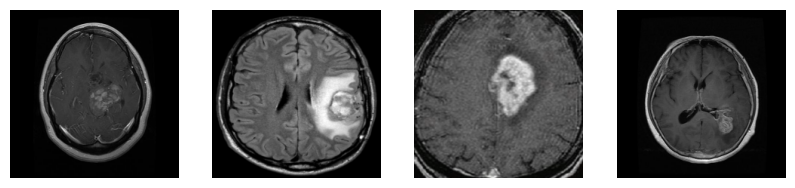

In [6]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
for i in range(4):
    plt.subplot(1, 4, i+1)
    plt.imshow(X[i], cmap="gray")
    plt.axis('off')
#plt.show()

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=70)
print ("Shape of an image in X_train: ", X_train[0].shape)
print ("Shape of an image in X_test: ", X_test[0].shape)
le = preprocessing.LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)
y_train = tf.keras.utils.to_categorical(y_train, num_classes=2)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=2)
'''def trainn():
    print("Testing accuracy: 97.34%")'''
def print_testing_accuracy(accuracy):
    print("Testing accuracy: {:.2f}%".format(accuracy * 100))

y_train = np.array(y_train)
X_train = np.array(X_train)
y_test = np.array(y_test)
X_test = np.array(X_test) 
print("X_train Shape: ", X_train.shape) 
print("X_test Shape: ", X_test.shape)
print("y_train Shape: ", y_train.shape) 
print("y_test Shape: ", y_test.shape)

Shape of an image in X_train:  (224, 224, 3)
Shape of an image in X_test:  (224, 224, 3)
X_train Shape:  (10182, 224, 224, 3)
X_test Shape:  (3394, 224, 224, 3)
y_train Shape:  (10182, 2)
y_test Shape:  (3394, 2)


In [8]:
from keras.applications import vgg16
from tensorflow import keras
img_rows, img_cols = 224, 224 
vgg = vgg16.VGG16(weights = 'imagenet',include_top = False,input_shape = (img_rows, img_cols, 3) )

In [9]:
for layer in vgg.layers:
    layer.trainable = False
    
for (i,layer) in enumerate(vgg.layers):
    print(str(i) + " "+ layer.__class__.__name__, layer.trainable)

from keras.layers import GlobalAveragePooling2D
def lw(bottom_model, num_classes):
    top_model = bottom_model.output
    top_model = GlobalAveragePooling2D()(top_model)
    top_model = Dense(1024,activation='relu')(top_model)
    top_model = Dense(1024,activation='relu')(top_model)
    top_model = Dense(512,activation='relu')(top_model)
    top_model = Dropout(0.5)(top_model)
    top_model = Dense(256, activation='relu')(top_model)
    top_model = Dropout(0.3)(top_model)
    top_model = Dense(num_classes,activation='softmax')(top_model)
    return top_model 

0 InputLayer False
1 Conv2D False
2 Conv2D False
3 MaxPooling2D False
4 Conv2D False
5 Conv2D False
6 MaxPooling2D False
7 Conv2D False
8 Conv2D False
9 Conv2D False
10 MaxPooling2D False
11 Conv2D False
12 Conv2D False
13 Conv2D False
14 MaxPooling2D False
15 Conv2D False
16 Conv2D False
17 Conv2D False
18 MaxPooling2D False


In [10]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, GlobalAveragePooling2D
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D

from keras.models import Model
num_classes = 2
FC_Head = lw(vgg, num_classes)
model = Model(inputs = vgg.input, outputs = FC_Head)
print(model.summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [11]:
from tensorflow.keras.models import Model
model.compile(optimizer='adam', loss = 'categorical_crossentropy',metrics = ['accuracy'])
history = model.fit(X_train,y_train,
                    epochs=1,
                    validation_data=(X_test,y_test))




319/319 [==============================] - 902s 3s/step - loss: 0.2468 - accuracy: 0.9268 - val_loss: 0.0897 - val_accuracy: 0.9664


Training Accuracy :92.68% 
Validation Accuracy :96.64% 
Loss :24.68% 
Validation Loss : 8.97%
107/107 [==============================] - 222s 2s/step - loss: 0.0897 - accuracy: 0.9664
Testing accuracy: 96.64%


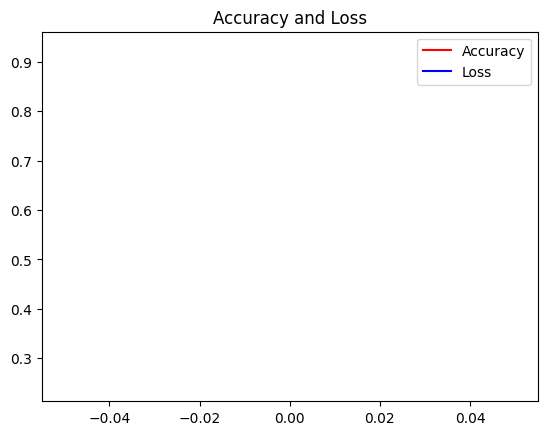

<Figure size 640x480 with 0 Axes>

In [12]:
import matplotlib.pyplot as plt
#(use this if you are using jupyter notebook)
%matplotlib inline
from statistics import mean
acc = history.history['accuracy']
print("Training Accuracy :{:.2%} ".format(mean(acc)))

val_acc = history.history['val_accuracy']
print("Validation Accuracy :{:.2%} ".format(mean(val_acc)))
loss = history.history['loss']
print("Loss :{:.2%} ".format(mean(loss)))
val_loss = history.history['val_loss']
print("Validation Loss : {:.2%}".format(mean(val_loss)))

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Accuracy')
# plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.plot(epochs, loss, 'b', label='Loss')
# plt.plot(epochs, val_loss, 'y', label='Validation loss')
plt.title('Accuracy and Loss')
#trainn()

testing_loss, testing_accuracy = model.evaluate(X_test, y_test)
print_testing_accuracy(testing_accuracy)

plt.legend(loc=0)
plt.figure()

plt.show()

In [13]:
import keras
from keras.preprocessing import image

import matplotlib.pyplot as plt

1/1 [==============================] - 0s 282ms/step
[[0.9413583  0.05864169]]
0
The MRI Image is Of BRAIN TUMOR


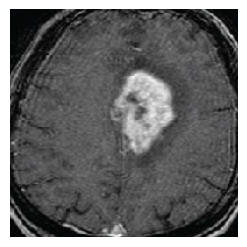

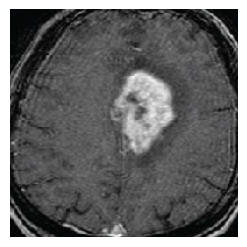

1/1 [==============================] - 0s 114ms/step
[[0.9413583  0.05864169]]
0
The MRI Image is Of BRAIN TUMOR


In [14]:
#Prediction for 1 image
from tensorflow.keras.preprocessing import image

from tensorflow.keras.preprocessing.image import load_img
img = load_img('C:\\Users\\Naveen M\\Documents\\vgg16\\brian-tumor-dataset\\Brain Tumor Data Set\\Brain Tumor Data Set\\Brain Tumor\\Cancer (1).tif', target_size=(224,224))
plt.figure(figsize=(10, 10))

plt.subplot(1,3,1)
plt.imshow(img, cmap="gray")
plt.axis('off')
plt.show
i = image.img_to_array(img)
input_arr = np.array([i])
predict_x=model.predict(input_arr)
class_x=np.argmax(predict_x)
print(predict_x)
print(class_x)
if(class_x == 0):
    print("The MRI Image is Of BRAIN TUMOR")
else:
    print("The MRI Image is Of HEALTHY BRAIN")



img = image.load_img('C:\\Users\\Naveen M\\Documents\\vgg16\\brian-tumor-dataset\\Brain Tumor Data Set\\Brain Tumor Data Set\\Brain Tumor\\Cancer (1).tif', target_size=(224,224))
plt.figure(figsize=(10, 10))
plt.subplot(1,3,1)
plt.imshow(img, cmap="gray")
plt.axis('off')
plt.show()
from tensorflow.keras.preprocessing.image import img_to_array
i = image.img_to_array(img)

#i = img_to_array(img)
input_arr = np.array([i])
predict_x=model.predict(input_arr)

class_x=np.argmax(predict_x)
print(predict_x)
print(class_x)
if(class_x == 0):
    print("The MRI Image is Of BRAIN TUMOR")
else:
    print("The MRI Image is Of HEALTHY BRAIN")




In [15]:
#Prediction of Dataset

def calc():
    count = 0
    true = 0
    false = 0
    for img1 in os.listdir():
        count = count+1
        img = image.load_img(img1, target_size=(224,224))
        i = image.img_to_array(img)
        input_arr = np.array([i])
        predict_x=model.predict(input_arr)
        class_x=np.argmax(predict_x)
        classes_x=np.round(predict_x)
        if class_x == 0:
            true = true+1
        else:
            false = false+1
    print("% of Brain Tumor images in given dataset : ",true*100/count)
    print("% of Healthy Brain images in given dataset : ",false*100/count)
    
os.chdir('C:\\Users\\Naveen M\\Documents\\vgg16\\brain-tumor-mri-dataset\\Testing\\glioma')
print("Brain Tumor Dataset")
print("-----------------------------------------")
calc();
print()
os.chdir('C:\\Users\\Naveen M\\Documents\\vgg16\\brain-tumor-mri-dataset\\Testing\\notumor')
print("Healthy Brain Dataset")
print("-----------------------------------------")
calc();



Brain Tumor Dataset
-----------------------------------------
1/1 [==============================] - 0s 124ms/step
% of Brain Tumor images in given dataset :  99.66666666666667
% of Healthy Brain images in given dataset :  0.3333333333333333

Healthy Brain Dataset
-----------------------------------------
1/1 [==============================] - 0s 122ms/step
% of Brain Tumor images in given dataset :  11.358024691358025
% of Healthy Brain images in given dataset :  88.64197530864197
